In [210]:
#Initialisation Cell
import math
import random
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [211]:
def hist(data,name,bins):
    plt.hist(data,bins=bins)
    plt.title(name)
    plt.show()
    
def min_max(column):
    return (column-column.min())/(column.max()-column.min())


def standardization(column):
    return (column - column.mean())/column.std()

def dif(h,y):
    for i in range(h.shape[0]):
        h[i] = h[i]-y[i]
    return h

<h2>Import Data</h2>

In [212]:
df = pd.read_csv("GBPUSD_Candlestick_1_M_BID_12.03.2019-12.03.2022.csv")

df

,Local time,Open,High,Low,Close,Volume
0,12.03.2019 00:00:00.000 GMT+0200,1.31887,1.31901,1.31865,1.31887,305.47
1,12.03.2019 00:01:00.000 GMT+0200,1.31889,1.31940,1.31881,1.31936,277.34
2,12.03.2019 00:02:00.000 GMT+0200,1.31939,1.32333,1.31934,1.32321,345.94
3,12.03.2019 00:03:00.000 GMT+0200,1.32321,1.32866,1.32310,1.32845,365.84
4,12.03.2019 00:04:00.000 GMT+0200,1.32845,1.32889,1.32511,1.32536,467.78
...,...,...,...,...,...,...
1128222,11.03.2022 23:55:00.000 GMT+0200,1.30368,1.30386,1.30364,1.30364,46.31
1128223,11.03.2022 23:56:00.000 GMT+0200,1.30363,1.30397,1.30359,1.30362,77.25
1128224,11.03.2022 23:57:00.000 GMT+0200,1.30363,1.30363,1.30361,1.30361,17.17
1128225,11.03.2022 23:58:00.000 GMT+0200,1.30361,1.30398,1.30361,1.30371,62.32


<h2>Clean the Data</h2>

<h3>Get Statistical Summary of the data</h3>

In [213]:
print("The data has the following shape:\n%d rows and %d columns" %(df.shape[0],df.shape[1]))
print(df.head())
print("The statistical summary is given as:")
print(df.describe())
print("Data set consist of the following data types")
df.dtypes

The data has the following shape:
1128227 rows and 6 columns
                         Local time     Open     High      Low    Close  \
0  12.03.2019 00:00:00.000 GMT+0200  1.31887  1.31901  1.31865  1.31887   
1  12.03.2019 00:01:00.000 GMT+0200  1.31889  1.31940  1.31881  1.31936   
2  12.03.2019 00:02:00.000 GMT+0200  1.31939  1.32333  1.31934  1.32321   
3  12.03.2019 00:03:00.000 GMT+0200  1.32321  1.32866  1.32310  1.32845   
4  12.03.2019 00:04:00.000 GMT+0200  1.32845  1.32889  1.32511  1.32536   

   Volume  
0  305.47  
1  277.34  
2  345.94  
3  365.84  
4  467.78  
The statistical summary is given as:
               Open          High           Low         Close        Volume
count  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06
mean   1.315328e+00  1.315434e+00  1.315222e+00  1.315327e+00  1.187006e+02
std    5.638901e-02  5.637545e-02  5.640176e-02  5.638898e-02  2.821358e+02
min    1.141000e+00  1.141650e+00  1.140950e+00  1.141010e+00  0.000000e+00

Local time     object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
dtype: object

<h3>Remove Useless features</h3>

In [214]:
df = df.drop('Local time',axis=1)

<h3>Remove missing data if any</h3>

In [215]:
missingValuesForOpen = np.where(df["Open"].isnull() == True)
infValuesForOpen = np.where(np.isinf(df["Open"]) == True)
print('There are',len(missingValuesForOpen[0]),'missing values and',len(infValuesForOpen[0]),'inf values in the Open column:',missingValuesForOpen,infValuesForOpen)


missingValuesForHigh = np.where(df["High"].isnull() == True)
infValuesForHigh = np.where(np.isinf(df["High"]) == True)
print('There are',len(missingValuesForHigh[0]),'missing values and',len(infValuesForHigh[0]),'inf values in the High column:',missingValuesForHigh,infValuesForHigh)

missingValuesForLow = np.where(df["Low"].isnull() == True)
infValuesForLow = np.where(np.isinf(df["Low"]) == True)
print('There are',len(missingValuesForLow[0]),'missing values and',len(infValuesForLow[0]),'inf values in the Low column:',missingValuesForLow,infValuesForLow)

missingValuesForClose = np.where(df["Close"].isnull() == True)
infValuesForClose = np.where(np.isinf(df["Close"]) == True)
print('There are',len(missingValuesForClose[0]),'missing values and',len(infValuesForClose[0]),'inf values in the Close column:',missingValuesForClose,infValuesForClose)

missingValuesForVolume = np.where(df["Volume"].isnull() == True)
infValuesForVolume = np.where(np.isinf(df["Volume"]) == True)
print('There are',len(missingValuesForVolume[0]),'missing values and',len(infValuesForVolume[0]),'inf values in the Volume column:',missingValuesForVolume,infValuesForVolume)

There are 0 missing values and 0 inf values in the Open column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the High column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Low column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Close column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Volume column: (array([], dtype=int64),) (array([], dtype=int64),)


<h3>Feature Scaling</h3>

<p>Due to the order of magnitude of values in the Volume column with respect to the other columns, we are prompted to perform a transformation on the values of the Volume column before applying feature scaling.<p>

In [216]:
df['Volume'] = np.sqrt(np.sqrt(df['Volume']))

In [217]:
df['High'] = min_max(df['High'])
df['Low'] = min_max(df['Low'])
df['Open'] = min_max(df['Open'])
df['Volume'] = min_max(df['Volume'])
display(df)

,Open,High,Low,Close,Volume
0,0.627120,0.626139,0.626874,1.31887,0.204230
1,0.627190,0.627515,0.627439,1.31936,0.199356
2,0.628953,0.641390,0.629308,1.32321,0.210682
3,0.642421,0.660206,0.642572,1.32845,0.213649
4,0.660896,0.661018,0.649663,1.32536,0.227189
...,...,...,...,...,...
1128222,0.573564,0.572654,0.573923,1.30364,0.127437
1128223,0.573388,0.573042,0.573747,1.30362,0.144828
1128224,0.573388,0.571842,0.573817,1.30361,0.099442
1128225,0.573317,0.573078,0.573817,1.30371,0.137257


In [218]:
#df['Close'] = min_max(df['Close'].values.reshape(df.shape[0],1))
df['Close']

0          1.31887
1          1.31936
2          1.32321
3          1.32845
4          1.32536
            ...   
1128222    1.30364
1128223    1.30362
1128224    1.30361
1128225    1.30371
1128226    1.30343
Name: Close, Length: 1128227, dtype: float64

<h3>Assess Distribution</h3>

array([[<AxesSubplot:title={'center':'Open'}>]], dtype=object)

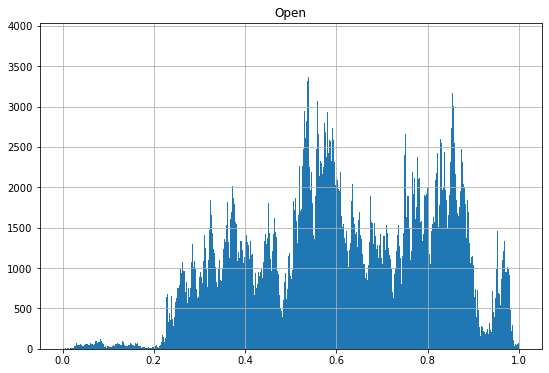

In [219]:
bins = round(math.sqrt(df.shape[0]))
#Plot Distribution of Open price
df.hist(column="Open", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'High'}>]], dtype=object)

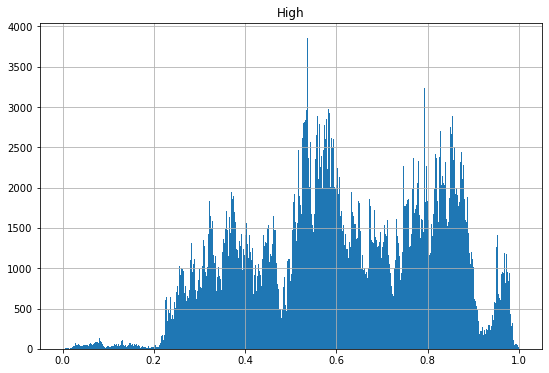

In [220]:
#Plot Distribution of High price
df.hist(column="High", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

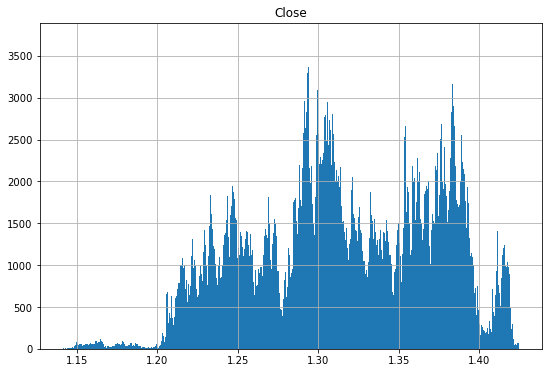

In [221]:
#Plot Distribution of Close price
df.hist(column="Close", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Low'}>]], dtype=object)

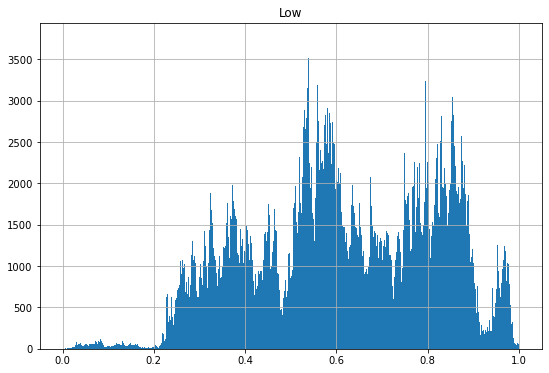

In [222]:
#Plot Distribution of Low price
df.hist(column="Low", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

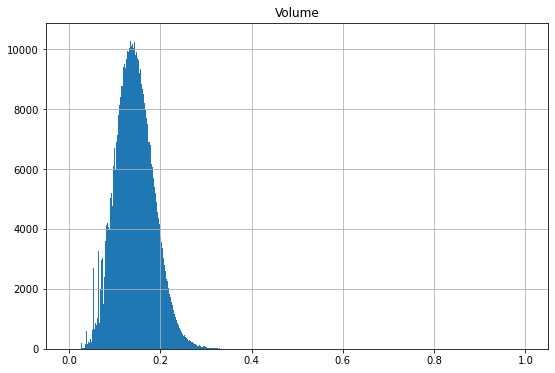

In [223]:
#Plot Distribution of Volume price
df.hist(column="Volume", figsize=(9,6),bins=bins)

<h3>Box Plots</h3>

<AxesSubplot:>

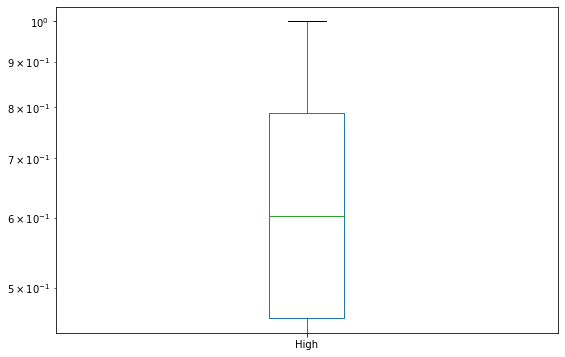

In [224]:
df['High'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

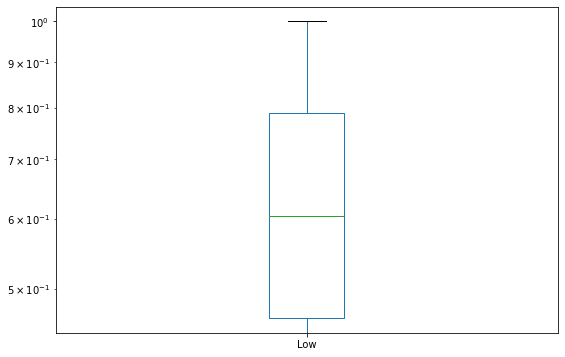

In [225]:
df['Low'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

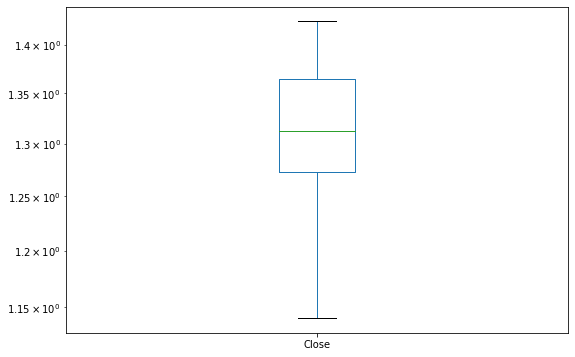

In [226]:
df['Close'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

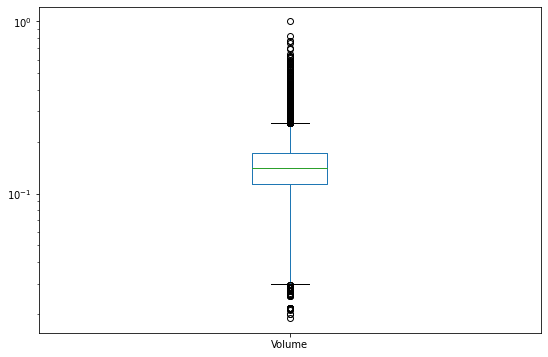

In [227]:
df['Volume'].plot(kind='box',figsize=(9,6),logy=True)

<h3>Scatter Plots</h3>

<AxesSubplot:xlabel='Open', ylabel='Close'>

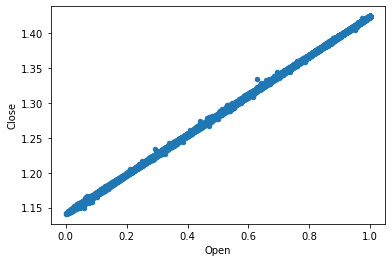

In [228]:
df.plot.scatter(x='Open',y='Close')

<AxesSubplot:xlabel='High', ylabel='Close'>

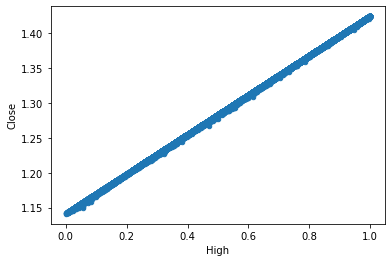

In [229]:
df.plot.scatter(x='High',y='Close')

<AxesSubplot:xlabel='Low', ylabel='Close'>

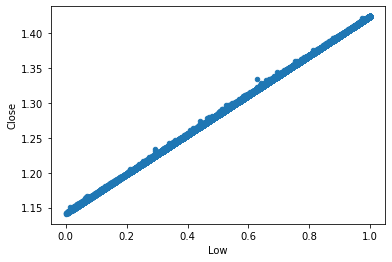

In [230]:
df.plot.scatter(x='Low',y='Close')

<AxesSubplot:xlabel='Volume', ylabel='Close'>

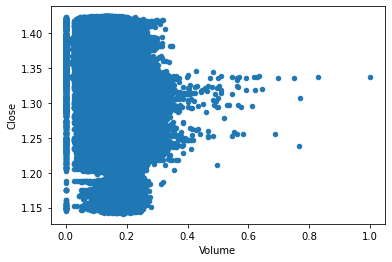

In [231]:
df.plot.scatter(x='Volume',y='Close')

<h3>Conclusion</h3>
<p>From the above diagram we can see that Open price, High Price and Low Price are suitable features to use when training the model.However, the Volume feature is not suitable because the feature has an skewed distribution, many outliers and has a bad correlation to the Closing Price. Thus we will not use the Volume feature to train the model<p>

In [232]:
df = df.drop('Volume',axis=1)
scaled_Y = df['Close']
df = df.drop('Close',axis=1)

#add the bias column to the dataset
df.insert(loc=0,column='Bias',value=np.ones((df.shape[0],1)))
scaled_X = df

display(scaled_X)
display(scaled_Y)
df

,Bias,Open,High,Low
0,1.0,0.627120,0.626139,0.626874
1,1.0,0.627190,0.627515,0.627439
2,1.0,0.628953,0.641390,0.629308
3,1.0,0.642421,0.660206,0.642572
4,1.0,0.660896,0.661018,0.649663
...,...,...,...,...
1128222,1.0,0.573564,0.572654,0.573923
1128223,1.0,0.573388,0.573042,0.573747
1128224,1.0,0.573388,0.571842,0.573817
1128225,1.0,0.573317,0.573078,0.573817


0          1.31887
1          1.31936
2          1.32321
3          1.32845
4          1.32536
            ...   
1128222    1.30364
1128223    1.30362
1128224    1.30361
1128225    1.30371
1128226    1.30343
Name: Close, Length: 1128227, dtype: float64

,Bias,Open,High,Low
0,1.0,0.627120,0.626139,0.626874
1,1.0,0.627190,0.627515,0.627439
2,1.0,0.628953,0.641390,0.629308
3,1.0,0.642421,0.660206,0.642572
4,1.0,0.660896,0.661018,0.649663
...,...,...,...,...
1128222,1.0,0.573564,0.572654,0.573923
1128223,1.0,0.573388,0.573042,0.573747
1128224,1.0,0.573388,0.571842,0.573817
1128225,1.0,0.573317,0.573078,0.573817


In [319]:
class LinearRegression:
    def __init__(self,feature_samples,labels):
        self.X = feature_samples
        self.Y = labels
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(feature_samples,labels,test_size=0.2)
        self.parameters = np.ones((feature_samples.shape[1],1))
        self.accuracy = []
        self.epoch_list = []
    
        
        
    def TrainByBatchGradientDescent(self,epochs=None,epsilon=0.01,learning_rate=0.001):
        thetas = np.ones((self.X.shape[1],1))
        
        Y = self.Y_train.values.reshape((self.Y_train.shape[0],1))
        X = self.X_train
        
        
        if epochs != None:
            epoch_list = []
            cost_list = []
            norm_list = []
            accuracy_list = [[],[],[],[]]
            prev_theta = np.zeros((self.X.shape[1],1))
            cur_theta = thetas
            for epoch in range(epochs):
                y_pred = np.dot(X,thetas)
                
                theta_grad = -(2/Y.shape[0])*(X.T.dot(Y-y_pred))
                
                thetas = thetas - learning_rate*theta_grad
                prev_theta = cur_theta
                cur_theta = thetas
                
                cost = np.mean(np.square(Y-y_pred))
                norm = LA.norm(cur_theta-prev_theta)
                
                accuracy = self.Test()
                
                
                if epoch%10==0:
                    epoch_list.append(epoch)
                    cost_list.append(cost)
                    norm_list.append(norm)
                    accuracy_list[0].append(accuracy[0])
                    accuracy_list[1].append(accuracy[1])
                    accuracy_list[2].append(accuracy[2])
                    accuracy_list[3].append(accuracy[3])
                    
                self.parameters = thetas
                self.accuracy = accuracy_list
                self.epoch_list = epoch_list
                
                
                
            self.parameters = thetas
            return (self.parameters,epoch_list,cost_list,norm_list)
            
        else:
            thetas_cur = np.ones((self.X.shape[1],1))
            thetas_prev = np.zeros((self.X.shape[1],1))

            epoch_list = []
            epoch = 0
            cost_list = []
            norm_list = []
            accuracy_list = [[],[],[],[]]
            cur_norm = LA.norm(thetas_cur-thetas_prev)
            prev_norm = 0
            
            while LA.norm(thetas_cur-thetas_prev) >= epsilon:
                y_pred = np.dot(X,thetas_cur)
                
                theta_grad = -(2/Y.shape[0])*(X.T.dot(Y-y_pred))
                theta_prev = thetas_cur
                
                thetas_cur = thetas_cur - learning_rate*theta_grad
                
                

                cost = np.mean(np.square(Y-y_pred))
                prev_norm = cur_norm
                cur_norm = LA.norm(thetas_cur-thetas_prev) 
                accuracy = self.Test()
                print(cur_norm)
                
                if epoch%10==0:
                    epoch_list.append(epoch)
                    cost_list.append(cost)
                    norm_list.append(cur_norm)
                    accuracy_list[0].append(accuracy[0])
                    accuracy_list[1].append(accuracy[1])
                    accuracy_list[2].append(accuracy[2])
                    accuracy_list[3].append(accuracy[3])
                    
                
                epoch+=1
                if cur_norm > prev_norm:
                    print('At ||theta_new - theta_old|| = ',LA.norm(thetas_cur-thetas_prev),' overshooting minimum occurs hence we break the loop')
                    break
                
                
                
                     
                    
            self.parameters = thetas_cur
            self.accuracy = accuracy_list
            self.epoch_list = epoch_list
            return self.parameters,epoch_list,cost_list,norm_list
        
        
        
    def Test(self):
        thetas = self.parameters
        X = self.X_test
        Y = self.Y_test.values.reshape((self.Y_test.shape[0],1))
        
        results = np.matmul(X,self.parameters)
        SSR = np.sum(np.square(results - Y))
        SST = np.sum(np.square(results - Y.mean()))
        
        R_2 = float(SSR/SST)
        MSE = float(np.mean(np.square(results-Y.mean())))
        MAE = float(np.mean(abs(results-Y.mean())))
        RMSD = float(np.sqrt(MSE))
        
        return R_2,MSE,MAE,RMSD
    
    
    def AccuracyPlots(self):
        epochs = self.epoch_list
        RSS = self.accuracy[0]
        MSE = self.accuracy[1]
        MAE = self.accuracy[2]
        RMSD = self.accuracy[3]

        plt.scatter(epochs,RSS,color='red',label='RSS')

        plt.scatter(epochs,MSE,color='blue',label='MSE')

        plt.scatter(epochs,MAE,color='green',label='MAE')

        plt.scatter(epochs,RMSD,color='yellow',label='RMSD')
        plt.title('Accuracy Plot')

        plt.legend(loc='upper right')

        plt.show()
    
    
    def Predict(self,Bias,Open,High,Low):
        a = Bias
        b = Open
        c = High
        d = Low
        
        
        
        feat = np.array([a,b,c,d]).reshape((4,1))
        parameters = self.parameters
        pred = np.matmul(feat.T,parameters)
        print("Prediction to:",feat.T," is = ",np.array(pred))
        return pred

In [320]:
model = LinearRegression(scaled_X,scaled_Y)

In [ ]:
c = model.TrainByBatchGradientDescent(epochs=1000000,learning_rate=0.001)


plt.scatter(c[1],c[2])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

plt.scatter(c[1],c[3])
plt.ylabel('Norm')
plt.xlabel('Epoch')
plt.show()

model.Test()
model.AccuracyPlots()
model.Predict(1.0,0.573599,0.572266,0.573182)

<ipython-input-319-94367ff8fe75>:118: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  results = np.matmul(X,self.parameters)


In [318]:
b = model.TrainByBatchGradientDescent(epsilon=0.1,learning_rate=0.000000001)

print(np.array(b[0]))
plt.scatter(b[1],b[2])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

plt.scatter(b[1],b[3])
plt.ylabel('Norm')
plt.xlabel('Epoch')
plt.show()
print('The weights are given by = ',b[0])

model.Test()
model.AccuracyPlots()
model.Predict(1.0,0.573599,0.572266,0.573182)

<ipython-input-313-94367ff8fe75>:118: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  results = np.matmul(X,self.parameters)


1.9999999953358254
1.9999999906716508
1.9999999860074762
1.9999999813433016
1.9999999766791268
1.9999999720149524
1.999999967350778
1.9999999626866034
1.999999958022429
1.9999999533582544
1.99999994869408
1.9999999440299054
1.999999939365731
1.9999999347015567
1.9999999300373823
1.9999999253732081
1.9999999207090338
1.9999999160448596
1.9999999113806852
1.999999906716511
1.9999999020523367
1.9999998973881625
1.9999998927239881
1.999999888059814
1.99999988339564
1.9999998787314657
1.9999998740672917
1.9999998694031176
1.9999998647389434
1.9999998600747693
1.9999998554105953
1.9999998507464214
1.9999998460822475
1.9999998414180735
1.9999998367538996
1.9999998320897254
1.9999998274255515
1.9999998227613778
1.9999998180972038
1.9999998134330301
1.9999998087688562
1.9999998041046825
1.9999997994405088
1.999999794776335
1.9999997901121611
1.9999997854479874
1.9999997807838137
1.9999997761196402
1.9999997714554665
1.9999997667912928
1.999999762127119
1.9999997574629456
1.999999752798772
1.999

KeyboardInterrupt: 

<ipython-input-307-ece13469a87b>:118: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  results = np.matmul(X,self.parameters)
<ipython-input-311-6154fd1b7392>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(a))


[             0
 Bias  0.754039
 Open  0.829500
 High  0.829755
 Low   0.829448 list([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
 list([2.6252103098607913, 2.409763985004064, 2.212465920715496, 2.03178635125724, 1.8663244611997225, 1.7147975156597033, 1.5760309067961382, 1.4489490393286368, 1.3325669843537782, 1.2259828366962322])
 list([0.004738887295452271, 0.004534899811904141, 0.00433970499956617, 0.004152924369431236, 0.0039741957465976585, 0.0038031725679901185, 0.0036395232103494566, 0.0034829303471863565, 0.0033330903334540876, 0.0031897126167440477])]


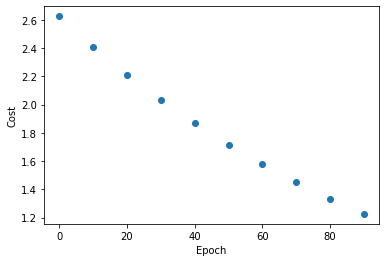

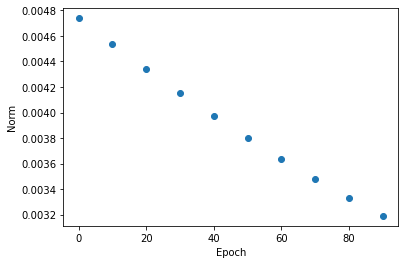

Prediction to: [[1.       0.573599 0.572266 0.573182]]  is =  [[2.18010468]]


<ipython-input-307-ece13469a87b>:118: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  results = np.matmul(X,self.parameters)


,0
0,2.180105


In [311]:
a = model.TrainByBatchGradientDescent(epochs=100)


plt.scatter(a[1],a[2])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

plt.scatter(a[1],a[3])
plt.ylabel('Norm')
plt.xlabel('Epoch')
plt.show()



model.Test()

model.Predict(1.0,0.573599,0.572266,0.573182)